# Relax Inc. Challenge

We need to use the data to make a prediction model to find the factors that predict future adoption by users. Adoption is defined as a person who has logged on 3 times in the past week

## Part 1: Data Wrangling

In [1]:
#import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
user_engagement = pd.read_csv('takehome_user_engagement.csv')

In [3]:
user_engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [4]:
user_info = pd.read_csv('takehome_users.csv', encoding='latin-1')
user_info.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [5]:
user_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [6]:
user_engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [7]:
#convert to date time
user_info.creation_time = pd.to_datetime(user_info.creation_time)

In [8]:
#use the units as seconds to make sure the last session creation time is readable
user_info.last_session_creation_time = pd.to_datetime(user_info.last_session_creation_time, unit='s')

In [9]:
user_info.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0


In [10]:
#drop email and name columns as they are unnessecary
user_info = user_info.drop(['email', 'name'], axis=1)

In [11]:
user_info.head()

,object_id,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0
1,2,2013-11-15 03:45:04,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0
2,3,2013-03-19 23:14:52,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0
3,4,2013-05-21 08:09:28,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0
4,5,2013-01-17 10:14:20,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0


In [12]:
user_info['creation_source'].unique()

array(['GUEST_INVITE', 'ORG_INVITE', 'SIGNUP', 'PERSONAL_PROJECTS',
       'SIGNUP_GOOGLE_AUTH'], dtype=object)

In [13]:
#create dummy variables (one hot encode) creation_source
creation_sources = pd.get_dummies(user_info.creation_source)

In [14]:
creation_sources.head()

,GUEST_INVITE,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH
0,1,0,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0


In [15]:
user_info = pd.concat([user_info, creation_sources], axis=1)

In [16]:
user_info.head()

,object_id,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,GUEST_INVITE,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH
0,1,2014-04-22 03:53:30,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,1,0,0,0,0
1,2,2013-11-15 03:45:04,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,0,1,0,0,0
2,3,2013-03-19 23:14:52,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,0,1,0,0,0
3,4,2013-05-21 08:09:28,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,1,0,0,0,0
4,5,2013-01-17 10:14:20,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,1,0,0,0,0


In [17]:
user_info.head()

,object_id,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,GUEST_INVITE,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH
0,1,2014-04-22 03:53:30,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,1,0,0,0,0
1,2,2013-11-15 03:45:04,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,0,1,0,0,0
2,3,2013-03-19 23:14:52,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,0,1,0,0,0
3,4,2013-05-21 08:09:28,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,1,0,0,0,0
4,5,2013-01-17 10:14:20,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,1,0,0,0,0


## Add adopted column

In [18]:
#convert time_stamp to datetime
user_engagement['time_stamp'] = pd.to_datetime(user_engagement['time_stamp'], format='%Y-%m-%d %H:%M:%S')

In [19]:
#group the weeks together
user_engagement['week'] = user_engagement['time_stamp'].dt.strftime('%U-%Y')

In [20]:
site_activity = user_engagement.groupby(['user_id', 'week'])

In [21]:
site_activity.head()

,time_stamp,user_id,visited,week
0,2014-04-22 03:53:30,1,1,16-2014
1,2013-11-15 03:45:04,2,1,45-2013
2,2013-11-29 03:45:04,2,1,47-2013
3,2013-12-09 03:45:04,2,1,49-2013
4,2013-12-25 03:45:04,2,1,51-2013
...,...,...,...,...
207912,2013-09-06 06:14:15,11996,1,35-2013
207913,2013-01-15 18:28:37,11997,1,02-2013
207914,2014-04-27 12:45:16,11998,1,17-2014
207915,2012-06-02 11:55:59,11999,1,22-2012


In [22]:
visits_per_week = user_engagement.groupby(['user_id', 'week']).size().reset_index()

In [23]:
visits_per_week.head()

,user_id,week,0
0,1,16-2014,1
1,2,01-2014,1
2,2,05-2014,2
3,2,06-2014,2
4,2,07-2014,1


In [24]:
visits_per_week = visits_per_week.rename(columns={0: 'num_visits'})

In [25]:
visits_per_week.head()

,user_id,week,num_visits
0,1,16-2014,1
1,2,01-2014,1
2,2,05-2014,2
3,2,06-2014,2
4,2,07-2014,1


In [26]:
visits_per_week['is_adopted'] = visits_per_week['num_visits'] >= 3

In [27]:
visits_per_week.head()

,user_id,week,num_visits,is_adopted
0,1,16-2014,1,False
1,2,01-2014,1,False
2,2,05-2014,2,False
3,2,06-2014,2,False
4,2,07-2014,1,False


In [28]:
visits_per_week['is_adopted'].replace({False: 0, True: 1}, inplace=True)

In [29]:
visits_per_week.head()

,user_id,week,num_visits,is_adopted
0,1,16-2014,1,0
1,2,01-2014,1,0
2,2,05-2014,2,0
3,2,06-2014,2,0
4,2,07-2014,1,0


In [30]:
#create list of user adoption
adopted_users = list(visits_per_week[visits_per_week.is_adopted==True].user_id.unique())

In [31]:
#add is_adopted list as column to user_info
user_info['is_adopted'] = user_info.object_id.apply(lambda x: x in adopted_users).astype(int)

In [32]:
user_info.head()

,object_id,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,GUEST_INVITE,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH,is_adopted
0,1,2014-04-22 03:53:30,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,1,0,0,0,0,0
1,2,2013-11-15 03:45:04,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,0,1,0,0,0,0
2,3,2013-03-19 23:14:52,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,0,1,0,0,0,0
3,4,2013-05-21 08:09:28,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,1,0,0,0,0,0
4,5,2013-01-17 10:14:20,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,1,0,0,0,0,0


In [33]:
adopted_num = 0
for i in range(len(user_info['is_adopted'])):
    adopted_num += user_info['is_adopted'][i]
print('{} users are considered adopted'.format(adopted_num))

1432 users are considered adopted


In [34]:
users_tot = len(user_info['is_adopted'])

In [35]:
(adopted_num/users_tot)*100

11.933333333333334

Around 12% of the users are considered adopted

## Exploratory Data Analysis

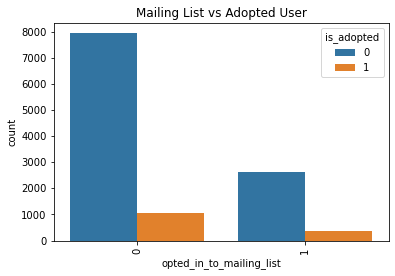

In [36]:
#see if a person is opted into mailing list and is an adopted user
sns.countplot(x='opted_in_to_mailing_list', data = user_info, hue='is_adopted')
plt.xticks(rotation=90)
plt.title('Mailing List vs Adopted User')
plt.show()

Being on the mailing list does not have much of an impact on a person being considered an adopted user. It seems that there are more who are adopted users that aren't subscribed to the site than there are users who are adopted and opted into the mailing list. 

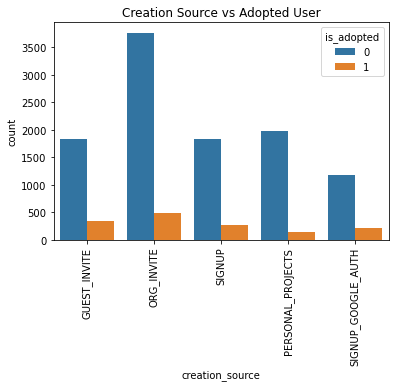

In [37]:
#look at how a person made their account and whether they are an adopted user
sns.countplot(x='creation_source', data = user_info, hue='is_adopted')
plt.xticks(rotation=90)
plt.title('Creation Source vs Adopted User')
plt.show()

In [38]:
#now that we saw the relationship between the creation source and adopted users, we can drop the qualitative creation source col
user_info = user_info.drop(['creation_source'], axis=1)

In [39]:
user_info.head()

,object_id,creation_time,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,GUEST_INVITE,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH,is_adopted
0,1,2014-04-22 03:53:30,2014-04-22 03:53:30,1,0,11,10803.0,1,0,0,0,0,0
1,2,2013-11-15 03:45:04,2014-03-31 03:45:04,0,0,1,316.0,0,1,0,0,0,0
2,3,2013-03-19 23:14:52,2013-03-19 23:14:52,0,0,94,1525.0,0,1,0,0,0,0
3,4,2013-05-21 08:09:28,2013-05-22 08:09:28,0,0,1,5151.0,1,0,0,0,0,0
4,5,2013-01-17 10:14:20,2013-01-22 10:14:20,0,0,193,5240.0,1,0,0,0,0,0


In [58]:
user_info.isna().sum()

object_id                        0
creation_time                    0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
GUEST_INVITE                     0
ORG_INVITE                       0
PERSONAL_PROJECTS                0
SIGNUP                           0
SIGNUP_GOOGLE_AUTH               0
is_adopted                       0
dtype: int64

## Modeling

In [59]:
X = user_info.drop(['is_adopted', 'creation_time', 'last_session_creation_time', 'invited_by_user_id'], axis=1)
y = user_info['is_adopted']

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [63]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93      3170
           1       0.08      0.01      0.02       430

    accuracy                           0.86      3600
   macro avg       0.48      0.50      0.47      3600
weighted avg       0.78      0.86      0.82      3600



In [65]:
#feature importance
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

In [66]:
print(importances)

object_id                     0.548910
org_id                        0.408426
opted_in_to_mailing_list      0.011367
enabled_for_marketing_drip    0.009963
PERSONAL_PROJECTS             0.005728
GUEST_INVITE                  0.004020
SIGNUP_GOOGLE_AUTH            0.004017
ORG_INVITE                    0.003997
SIGNUP                        0.003571
dtype: float64


# Conclusion
Overall, when analyzing the data to see the most important features in predicting whether a user is adopted (visits site 3 or more times a week), object id and their organization matters most when creating a prediction model. I noticed that only about 12 percent of users were considered adopted, so I dropped the columns that did not matter like name, email, whether they were invited by user id, and the times of login (basically any datetimes as they hindered the random forest process)